# Proyecto Relaciones Contaminantes Salud

# Contaminante PM2_5

In [1]:
# Se van a agrupar los registros del contaminante en semanas

# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante = 'PM2_5'
# Se declaran las columnas a extraer de la base de datos
columns = ['timestamp', contaminante]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante = pd.read_csv('filled.csv', usecols=columns).dropna()
# Se convierten los strings a objeto datetime
strfdt = '%d-%b-%y %H'
dataframecontaminante['timestamp'] = pd.to_datetime(dataframecontaminante['timestamp'], errors = 'coerce', format=strfdt)
# Se eliminan los espacios vacios
dataframecontaminante = dataframecontaminante.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante = dataframecontaminante.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante

,timestamp,PM2_5
0,2003-06-01 00:00:00,99.00
1,2003-06-01 00:00:00,62.00
2,2003-06-01 00:00:00,29.00
3,2003-06-01 01:00:00,98.00
4,2003-06-01 01:00:00,75.00
...,...,...
528438,2018-12-31 23:00:00,22.58
528439,2018-12-31 23:00:00,199.00
528440,2018-12-31 23:00:00,111.00
528441,2018-12-31 23:00:00,295.00


In [2]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante['timestamp'] = dataframecontaminante['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante

,timestamp,PM2_5
0,2003-06-01 00,99.00
1,2003-06-01 00,62.00
2,2003-06-01 00,29.00
3,2003-06-01 01,98.00
4,2003-06-01 01,75.00
...,...,...
528438,2018-12-31 23,22.58
528439,2018-12-31 23,199.00
528440,2018-12-31 23,111.00
528441,2018-12-31 23,295.00


# (Año 2015)

In [3]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2015'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

,timestamp,PM2_5
0,2015-01-01 00,17.0
1,2015-01-01 01,80.0
2,2015-01-01 01,27.0
3,2015-01-01 01,169.0
4,2015-01-01 01,15.0
...,...,...
38100,2015-12-31 23,46.0
38101,2015-12-31 23,88.0
38102,2015-12-31 23,75.0
38103,2015-12-31 23,39.0


In [4]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

,timestamp,PM2_5
0,2015-01-01 00:00:00,17.0
1,2015-01-01 01:00:00,80.0
2,2015-01-01 01:00:00,27.0
3,2015-01-01 01:00:00,169.0
4,2015-01-01 01:00:00,15.0
...,...,...
38100,2015-12-31 23:00:00,46.0
38101,2015-12-31 23:00:00,88.0
38102,2015-12-31 23:00:00,75.0
38103,2015-12-31 23:00:00,39.0


In [5]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

,timestamp,PM2_5,sem
0,2015-01-01 00:00:00,17.0,53
1,2015-01-01 01:00:00,80.0,53
2,2015-01-01 01:00:00,27.0,53
3,2015-01-01 01:00:00,169.0,53
4,2015-01-01 01:00:00,15.0,53
...,...,...,...
38100,2015-12-31 23:00:00,46.0,52
38101,2015-12-31 23:00:00,88.0,52
38102,2015-12-31 23:00:00,75.0,52
38103,2015-12-31 23:00:00,39.0,52


In [6]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI', 'ENTIDAD']
entidad = 19
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño = dataframeegresosaño.loc[dataframeegresosaño['ENTIDAD'] == entidad]
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI
2721,2015-12-01 00:00:00,19,C349
3052,2015-08-24 00:00:00,19,C186
3098,2015-07-15 00:00:00,19,C509
3254,2015-06-18 00:00:00,19,C509
8651,2015-05-09 00:00:00,19,C189
...,...,...,...
2923756,2015-06-10 00:00:00,19,J342
2931414,2015-08-18 00:00:00,19,M190
2934869,2015-09-09 00:00:00,19,C229
2943586,2015-11-20 00:00:00,19,K801


In [7]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI,sem
0,2015-12-01,19,C349,48
1,2015-08-24,19,C186,34
2,2015-07-15,19,C509,28
3,2015-06-18,19,C509,24
4,2015-05-09,19,C189,18
...,...,...,...,...
53336,2015-06-10,19,J342,23
53337,2015-08-18,19,M190,33
53338,2015-09-09,19,C229,36
53339,2015-11-20,19,K801,46


In [8]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     1068
2     1016
3     1026
4     1034
5      964
6     1036
7     1048
8      983
9      938
10     978
11     906
12    1011
13     932
14     978
15    1056
16    1018
17    1010
18     966
19    1044
20     988
21     999
22     977
23    1044
24    1021
25    1052
26    1022
27    1076
28    1106
29    1039
30    1060
31    1063
32    1072
33    1073
34    1087
35    1123
36    1077
37    1103
38    1105
39    1038
40    1129
41    1128
42    1117
43    1116
44    1115
45    1059
46     992
47    1066
48    1089
49    1106
50    1138
51     790
53     359
Name: sem, dtype: int64

In [9]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

<ipython-input-9-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-9-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-9-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contamin

,sem,PM2_5
0,1,23.58159
1,2,28.459635
2,3,26.091142
3,4,24.500555
4,5,27.313993
5,6,27.202835
6,7,30.406061
7,8,23.86917
8,9,26.325134
9,10,29.423156


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



2015


 Contaminante PM2_5 & CIE O809
Coeficiente de correlación de Pearson:  -0.24832817939293594
P-value:  0.07587964322275915
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.124
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.153
Time:                        07:32:26   Log-Likelihood:               -0.11146
No. Observations:                  41   AIC:                             4.223
Df Residuals:                      39   BIC:                             7.650
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.18575366136003524
El porcentaje de error de test es: 18.575366136003524


 Contaminante PM2_5 & CIE O829
Coeficiente de correlación de Pearson:  -0.212776309453614
P-value:  0.12991056476843724
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.1337
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.717
Time:                        07:32:26   Log-Likelihood:                 2.8429
No. Observations:                  41   AIC:                            -1.686
Df Residuals:                      39   BIC:                             1.741
Df Model:                           1                                         
Covariance Type:            nonrobust                           

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Coeficiente de correlación de Pearson:  -0.03396605344736632
P-value:  0.811068712656637
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9461
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.337
Time:                        07:32:26   Log-Likelihood:                 2.7591
No. Observations:                  41   AIC:                            -1.518
Df Residuals:                      39   BIC:                             1.909
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.




 Contaminante PM2_5 & CIE O069
Coeficiente de correlación de Pearson:  0.0011688954110198602
P-value:  0.9934381750197028
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.1617
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.690
Time:                        07:32:26   Log-Likelihood:               -0.41753
No. Observations:                  41   AIC:                             4.835
Df Residuals:                      39   BIC:                             8.262
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.1785
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.675
Time:                        07:32:26   Log-Likelihood:                 2.2775
No. Observations:                  41   AIC:                           -0.5549
Df Residuals:                      39   BIC:                             2.872
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3813      0.084      4.537      0.0

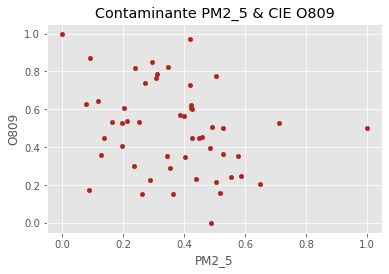

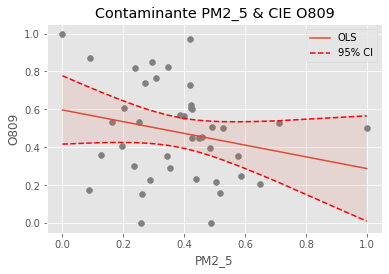

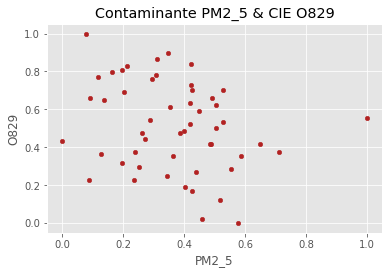

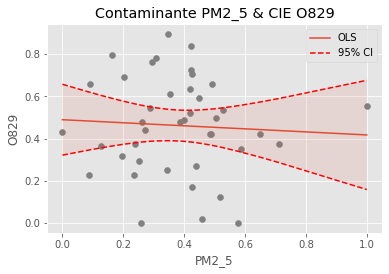

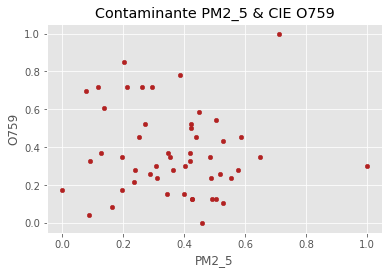

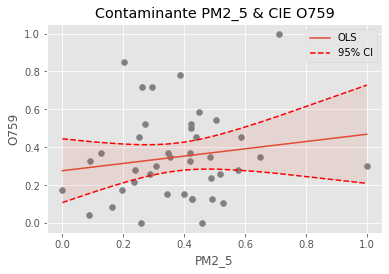

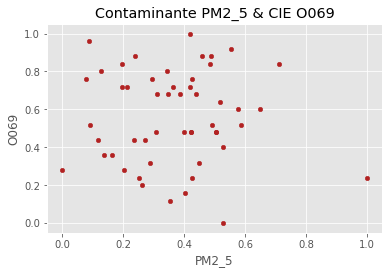

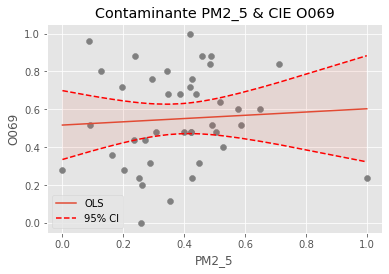

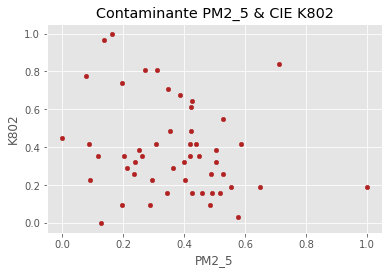

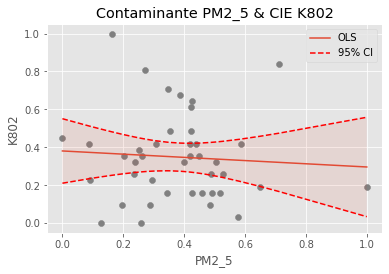

In [10]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import style
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import numpy as np

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
    
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 5

datacorr = []
colors = []
spoke_labels = []

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        
        dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
        for i in range (n):
            dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
        col_names = [contaminante, name]    
        
        # MODELO DE REGRESIÓN LINEAL
        # ==============================================================================
        spoke_labels.append(col_names[1])
        datos = pd.DataFrame(dataframegraficoañocontaminantecie, columns=col_names)
        datos = (datos - datos.min()) / (datos.max() - datos.min())
        # Gráfico
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        datos.plot(
            x    = col_names[0],
            y    = col_names[1],
            c    = 'firebrick',
            kind = "scatter",
            ax   = ax
        )
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        print('\n\n Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        
        # Correlación lineal entre las dos variables
        # ==============================================================================
        corr_test = pearsonr(x = datos[col_names[0]].fillna(0), y =  datos[col_names[1]].fillna(0))
        print("Coeficiente de correlación de Pearson: ", corr_test[0])
        print("P-value: ", corr_test[1])

        datacorr.append(abs(corr_test[0]))
        if(corr_test[0] < 0):
            colors.append('r')
        else: 
            colors.append('b')

        # División de los datos en train y test
        # ==============================================================================
        X = datos[[col_names[0]]].fillna(0)
        y = datos[col_names[1]].fillna(0)

        X_train, X_test, y_train, y_test = train_test_split(
            X.values.reshape(-1,1),
            y.values.reshape(-1,1),
            train_size   = 0.8,
            random_state = 1234,
            shuffle      = True
        )
        
        X_train = sm.add_constant(X_train, prepend=True)
        modelo = sm.OLS(endog=y_train, exog=X_train)
        modelo = modelo.fit()
        print(modelo.summary())
        
        sml = modelo.summary().as_latex()
        namefile = 'modelos_latex/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.tex'
        f = open(namefile, 'w')
        with open(namefile, 'w') as f:
            f.write(sml)

        # Intervalos de confianza para los coeficientes del modelo
        # # ==============================================================================
        modelo.conf_int(alpha=0.05)

        # Predicciones con intervalo de confianza del 95%
        # # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones.head(4)        

        # Predicciones con intervalo de confianza del 95%
        # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones['x'] = X_train[:, 1]
        predicciones['y'] = y_train
        predicciones = predicciones.sort_values('x')

        # Gráfico del modelo
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel(col_names[0])
        ax.set_ylabel(col_names[1])
        ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
        ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
        ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
        ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
        ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
        ax.legend()

        plt.savefig(contaminante + '/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.eps', format='eps')
        plt.savefig(contaminante + '/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')

        # Error de test del modelo 
        # ==============================================================================
        X_test = sm.add_constant(X_test, prepend=True)
        predicciones = modelo.predict(exog = X_test)
        rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
            )
        print("")
        vmin = abs(y_train.min())
        vmax = abs(y_train.max())
        pval = vmin + vmax
        pe = (rmse*100)/pval
        print(f"El error (rmse) de test es: {rmse}")
        print(f"El porcentaje de error de test es: {pe}")


    cont = cont+1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


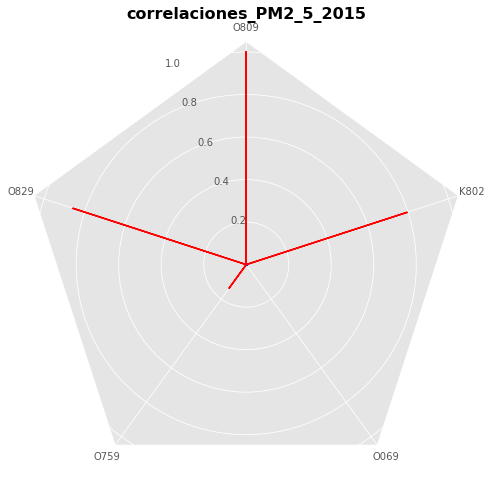

In [11]:
# Se importa el archivo creado
import visualization_spiderwebs

alldata = []
nd = len(datacorr)
for ii in range(nd):
    datatemp = []
    for yy in range(nd):
        if(ii==yy):
            datatemp.append(datacorr[ii])
        else: 
            datatemp.append(0)
    alldata.append(datatemp)
title = 'correlaciones_' + contaminante + '_' + año
visualization_spiderwebs.create_spiderwebs(alldata, 1, title, spoke_labels, colors, 'polygon')

# (Año 2016)

In [12]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2016'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

,timestamp,PM2_5
0,2016-01-01 00,36.0
1,2016-01-01 00,80.0
2,2016-01-01 01,161.0
3,2016-01-01 01,215.0
4,2016-01-01 01,70.0
...,...,...
24192,2016-12-31 19,71.0
24193,2016-12-31 20,96.0
24194,2016-12-31 21,122.0
24195,2016-12-31 22,133.0


In [13]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

,timestamp,PM2_5
0,2016-01-01 00:00:00,36.0
1,2016-01-01 00:00:00,80.0
2,2016-01-01 01:00:00,161.0
3,2016-01-01 01:00:00,215.0
4,2016-01-01 01:00:00,70.0
...,...,...
24192,2016-12-31 19:00:00,71.0
24193,2016-12-31 20:00:00,96.0
24194,2016-12-31 21:00:00,122.0
24195,2016-12-31 22:00:00,133.0


In [14]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

,timestamp,PM2_5,sem
0,2016-01-01 00:00:00,36.0,52
1,2016-01-01 00:00:00,80.0,52
2,2016-01-01 01:00:00,161.0,52
3,2016-01-01 01:00:00,215.0,52
4,2016-01-01 01:00:00,70.0,52
...,...,...,...
24192,2016-12-31 19:00:00,71.0,52
24193,2016-12-31 20:00:00,96.0,52
24194,2016-12-31 21:00:00,122.0,52
24195,2016-12-31 22:00:00,133.0,52


In [15]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI', 'ENTIDAD']
entidad = 19
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño = dataframeegresosaño.loc[dataframeegresosaño['ENTIDAD'] == entidad]
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI
3481,04/18/2016 00:00,19,D433
5587,06/01/2016 00:00,19,I619
7319,08/18/2016 00:00,19,Q531
231176,10/05/2016 00:00,19,O429
235923,12/28/2015 00:00,19,Z980
...,...,...,...
979888,06/29/2016 00:00,19,O240
981083,11/08/2016 00:00,19,S407
981131,11/08/2016 00:00,19,S407
1011116,07/28/2016 00:00,19,S099


In [16]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%m/%d/%Y %H:%M'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI,sem
0,2016-04-18,19,D433,16
1,2016-06-01,19,I619,22
2,2016-08-18,19,Q531,33
3,2016-10-05,19,O429,40
4,2016-12-18,19,T009,51
...,...,...,...,...
211,2016-06-29,19,O240,26
212,2016-11-08,19,S407,45
213,2016-11-08,19,S407,45
214,2016-07-28,19,S099,30


In [17]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1      5
2      1
3     11
4      4
5      6
6      3
7      1
8      3
9      7
10     2
11     4
12     2
13     1
14     6
15     6
16     6
17     3
18     6
19     6
20     2
21     3
22     5
23     5
24     1
25     7
26     5
27     4
28     2
29     2
30     8
31     2
32     7
33     6
34     1
35     2
36     4
37     5
38     2
39     5
40     4
41     2
42     6
43     4
44     2
45     7
46     5
47     2
48     3
49     3
50     7
51     6
52     4
Name: sem, dtype: int64

In [18]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

,sem,PM2_5
0,1,23.707391
1,2,25.419825
2,3,22.809728
3,4,22.696839
4,5,18.982482
5,6,19.966578
6,7,25.719497
7,8,19.512968
8,9,23.53012
9,10,21.243939


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



2016


 Contaminante PM2_5 & CIE F200
Coeficiente de correlación de Pearson:  -0.08411877768609871
P-value:  0.5532508067982946
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.3047
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.584
Time:                        07:32:30   Log-Likelihood:                -8.2725
No. Observations:                  41   AIC:                             20.54
Df Residuals:                      39   BIC:                             23.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.1463907114488158
El porcentaje de error de test es: 14.63907114488158


 Contaminante PM2_5 & CIE O809
Coeficiente de correlación de Pearson:  -0.04466552616146686
P-value:  0.7532058527487865
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                  0.007720
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.930
Time:                        07:32:30   Log-Likelihood:                -20.223
No. Observations:                  41   AIC:                             44.45
Df Residuals:                      39   BIC:                             47.87
Df Model:                           1                                         
Covariance Type:            nonrobust                            

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.




 Contaminante PM2_5 & CIE F312
Coeficiente de correlación de Pearson:  -0.07406744124662548
P-value:  0.6017803517982668
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7900
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.380
Time:                        07:32:30   Log-Likelihood:                 8.7591
No. Observations:                  41   AIC:                            -13.52
Df Residuals:                      39   BIC:                            -10.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Coeficiente de correlación de Pearson:  -0.07843848032473386
P-value:  0.5804477281966942
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                   0.04021
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.842
Time:                        07:32:31   Log-Likelihood:                 14.319
No. Observations:                  41   AIC:                            -24.64
Df Residuals:                      39   BIC:                            -21.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.




 Contaminante PM2_5 & CIE C029
Coeficiente de correlación de Pearson:  -0.19303171060461252
P-value:  0.17035364384474275
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.3142
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.578
Time:                        07:32:31   Log-Likelihood:                 33.351
No. Observations:                  41   AIC:                            -62.70
Df Residuals:                      39   BIC:                            -59.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

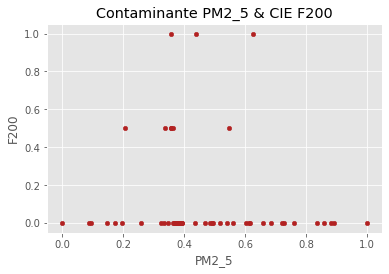

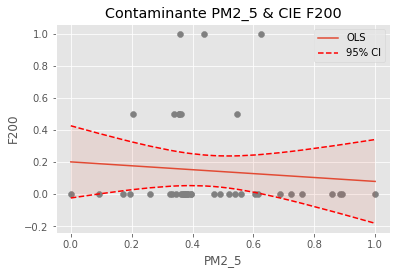

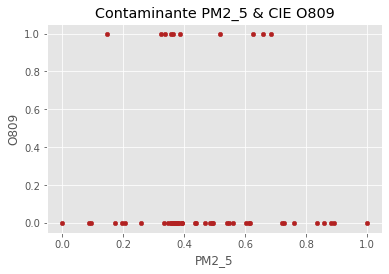

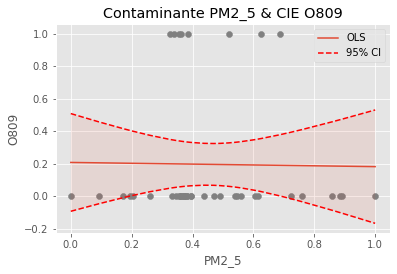

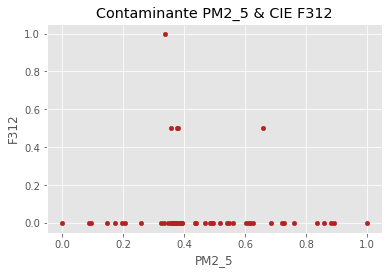

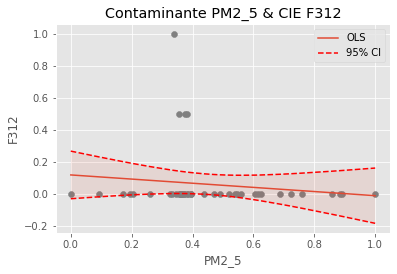

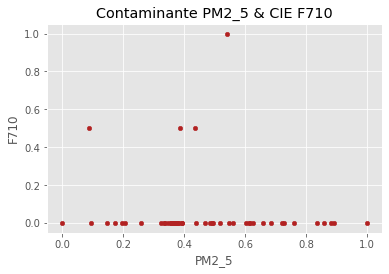

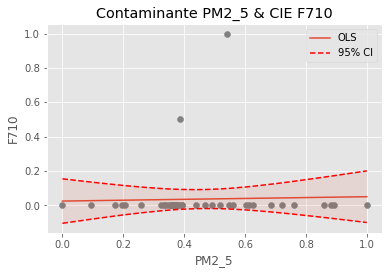

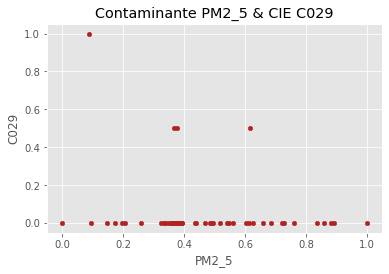

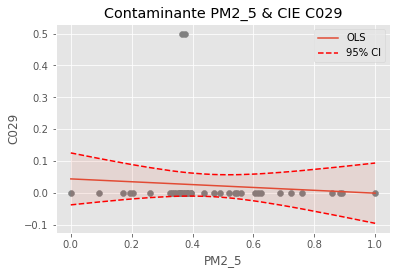

In [19]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import style
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import numpy as np

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
    
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 5

datacorr = []
colors = []
spoke_labels = []

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        
        dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
        for i in range (n):
            dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
        col_names = [contaminante, name]    
        
        # MODELO DE REGRESIÓN LINEAL
        # ==============================================================================
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.fillna(0)
        spoke_labels.append(col_names[1])
        datos = pd.DataFrame(dataframegraficoañocontaminantecie, columns=col_names)
        datos = (datos - datos.min()) / (datos.max() - datos.min())
        # Gráfico
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        datos.plot(
            x    = col_names[0],
            y    = col_names[1],
            c    = 'firebrick',
            kind = "scatter",
            ax   = ax
        )
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        print('\n\n Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        
        # Correlación lineal entre las dos variables
        # ==============================================================================
        corr_test = pearsonr(x = datos[col_names[0]].fillna(0), y =  datos[col_names[1]].fillna(0))
        print("Coeficiente de correlación de Pearson: ", corr_test[0])
        print("P-value: ", corr_test[1])

        datacorr.append(abs(corr_test[0]))
        if(corr_test[0] < 0):
            colors.append('r')
        else: 
            colors.append('b')

        # División de los datos en train y test
        # ==============================================================================
        X = datos[[col_names[0]]].fillna(0)
        y = datos[col_names[1]].fillna(0)

        X_train, X_test, y_train, y_test = train_test_split(
            X.values.reshape(-1,1),
            y.values.reshape(-1,1),
            train_size   = 0.8,
            random_state = 1234,
            shuffle      = True
        )
        
        X_train = sm.add_constant(X_train, prepend=True)
        modelo = sm.OLS(endog=y_train, exog=X_train)
        modelo = modelo.fit()
        print(modelo.summary())
        
        sml = modelo.summary().as_latex()
        namefile = 'modelos_latex/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.tex'
        f = open(namefile, 'w')
        with open(namefile, 'w') as f:
            f.write(sml)

        # Intervalos de confianza para los coeficientes del modelo
        # # ==============================================================================
        modelo.conf_int(alpha=0.05)

        # Predicciones con intervalo de confianza del 95%
        # # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones.head(4)        

        # Predicciones con intervalo de confianza del 95%
        # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones['x'] = X_train[:, 1]
        predicciones['y'] = y_train
        predicciones = predicciones.sort_values('x')

        # Gráfico del modelo
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel(col_names[0])
        ax.set_ylabel(col_names[1])
        ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
        ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
        ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
        ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
        ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
        ax.legend()

        plt.savefig(contaminante + '/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.eps', format='eps')
        plt.savefig(contaminante + '/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')

        # Error de test del modelo 
        # ==============================================================================
        X_test = sm.add_constant(X_test, prepend=True)
        predicciones = modelo.predict(exog = X_test)
        rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
            )
        print("")
        vmin = abs(y_train.min())
        vmax = abs(y_train.max())
        pval = vmin + vmax
        pe = (rmse*100)/pval
        print(f"El error (rmse) de test es: {rmse}")
        print(f"El porcentaje de error de test es: {pe}")


    cont = cont+1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


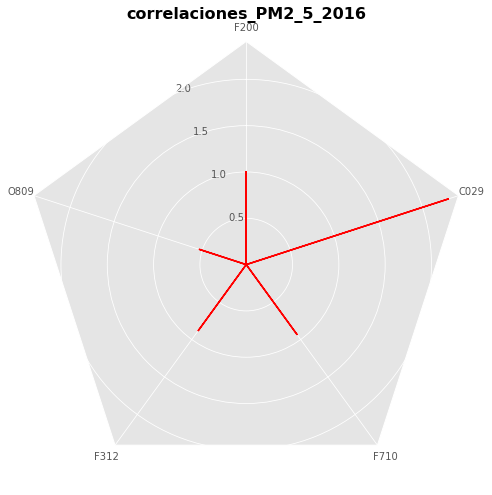

In [20]:
# Se importa el archivo creado
import visualization_spiderwebs

alldata = []
nd = len(datacorr)
for ii in range(nd):
    datatemp = []
    for yy in range(nd):
        if(ii==yy):
            datatemp.append(datacorr[ii])
        else: 
            datatemp.append(0)
    alldata.append(datatemp)
title = 'correlaciones_' + contaminante + '_' + año
visualization_spiderwebs.create_spiderwebs(alldata, 1, title, spoke_labels, colors, 'polygon')

# (Año 2017)

In [21]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2017'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

,timestamp,PM2_5
0,2017-01-01 01,349.0
1,2017-01-01 02,187.0
2,2017-01-01 03,101.0
3,2017-01-01 04,81.0
4,2017-01-01 05,47.0
...,...,...
25200,2017-12-31 22,12.0
25201,2017-12-31 22,12.0
25202,2017-12-31 22,23.0
25203,2017-12-31 23,22.0


In [22]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

,timestamp,PM2_5
0,2017-01-01 01:00:00,349.0
1,2017-01-01 02:00:00,187.0
2,2017-01-01 03:00:00,101.0
3,2017-01-01 04:00:00,81.0
4,2017-01-01 05:00:00,47.0
...,...,...
25200,2017-12-31 22:00:00,12.0
25201,2017-12-31 22:00:00,12.0
25202,2017-12-31 22:00:00,23.0
25203,2017-12-31 23:00:00,22.0


In [23]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

,timestamp,PM2_5,sem
0,2017-01-01 01:00:00,349.0,1
1,2017-01-01 02:00:00,187.0,1
2,2017-01-01 03:00:00,101.0,1
3,2017-01-01 04:00:00,81.0,1
4,2017-01-01 05:00:00,47.0,1
...,...,...,...
25200,2017-12-31 22:00:00,12.0,1
25201,2017-12-31 22:00:00,12.0,1
25202,2017-12-31 22:00:00,23.0,1
25203,2017-12-31 23:00:00,22.0,1


In [24]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI', 'ENTIDAD']
entidad = 19
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, sep='|', usecols=colums).dropna()
dataframeegresosaño = dataframeegresosaño.loc[dataframeegresosaño['ENTIDAD'] == entidad]
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI
9836,2017-02-07 00:00:00,19,F120
11959,2017-10-24 00:00:00,19,E104
25534,2017-05-26 00:00:00,19,O680
27114,2017-04-14 00:00:00,19,T634
37193,2017-03-18 00:00:00,19,Q248
...,...,...,...
2720507,2017-08-21 00:00:00,19,N61X
2723613,2017-11-05 00:00:00,19,O809
2726650,2017-07-22 00:00:00,19,O809
2727207,2017-12-09 00:00:00,19,O809


In [25]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI,sem
0,2017-02-07,19,F120,6
1,2017-10-24,19,E104,43
2,2017-05-26,19,O680,21
3,2017-04-14,19,T634,15
4,2017-03-18,19,Q248,11
...,...,...,...,...
56164,2017-08-21,19,N61X,34
56165,2017-11-05,19,O809,45
56166,2017-07-22,19,O809,29
56167,2017-12-09,19,O809,49


In [26]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     1199
2     1069
3     1051
4     1048
5     1038
6     1014
7     1053
8     1011
9     1039
10    1110
11    1068
12    1016
13    1030
14     978
15     965
16     959
17     954
18     989
19     943
20    1134
21    1016
22     968
23    1105
24    1147
25    1033
26    1040
27    1142
28    1025
29    1118
30    1178
31    1138
32    1100
33    1203
34    1114
35    1160
36    1178
37    1128
38    1145
39    1113
40    1169
41    1237
42    1129
43    1105
44    1121
45    1133
46    1149
47    1121
48    1139
49    1132
50    1057
51    1054
52     904
Name: sem, dtype: int64

In [27]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

,sem,PM2_5
0,1,28.333333
1,2,32.098859
2,3,24.279152
3,4,18.54067
4,5,24.60625
5,6,25.585075
6,7,17.51105
7,8,16.53271
8,9,21.716172
9,10,19.704478


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



2017


 Contaminante PM2_5 & CIE O809
Coeficiente de correlación de Pearson:  -0.0929919568384219
P-value:  0.51201934917238
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.4407
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.511
Time:                        07:32:36   Log-Likelihood:                -1.5258
No. Observations:                  41   AIC:                             7.052
Df Residuals:                      39   BIC:                             10.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.2557920612157221
El porcentaje de error de test es: 23.92408101958813


 Contaminante PM2_5 & CIE O829
Coeficiente de correlación de Pearson:  0.01387177591371587
P-value:  0.9222469173212414
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8181
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.371
Time:                        07:32:36   Log-Likelihood:                 1.6457
No. Observations:                  41   AIC:                            0.7086
Df Residuals:                      39   BIC:                             4.136
Df Model:                           1                                         
Covariance Type:            nonrobust                             

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.25280382527824
El porcentaje de error de test es: 25.280382527824003


 Contaminante PM2_5 & CIE O759
Coeficiente de correlación de Pearson:  -0.1720899673058678
P-value:  0.2224960891787431
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     4.967
Date:                Fri, 18 Mar 2022   Prob (F-statistic):             0.0317
Time:                        07:32:37   Log-Likelihood:                 20.570
No. Observations:                  41   AIC:                            -37.14
Df Residuals:                      39   BIC:                            -33.71
Df Model:                           1                                         
Covariance Type:            nonrobust                              

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.27812799702156316
El porcentaje de error de test es: 35.92486628195191


 Contaminante PM2_5 & CIE O069
Coeficiente de correlación de Pearson:  -0.34972483775595353
P-value:  0.011040695741378212
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     4.910
Date:                Fri, 18 Mar 2022   Prob (F-statistic):             0.0326
Time:                        07:32:37   Log-Likelihood:                 3.6407
No. Observations:                  41   AIC:                            -3.281
Df Residuals:                      39   BIC:                            0.1458
Df Model:                           1                                         
Covariance Type:            nonrobust                         

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.20803742630579086
El porcentaje de error de test es: 20.803742630579087


 Contaminante PM2_5 & CIE K802
Coeficiente de correlación de Pearson:  0.00628533548230314
P-value:  0.9647267920288384
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.1879
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.667
Time:                        07:32:37   Log-Likelihood:                 4.4309
No. Observations:                  41   AIC:                            -4.862
Df Residuals:                      39   BIC:                            -1.435
Df Model:                           1                                         
Covariance Type:            nonrobust                           

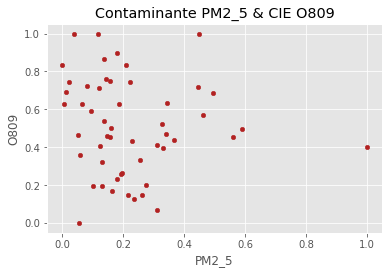

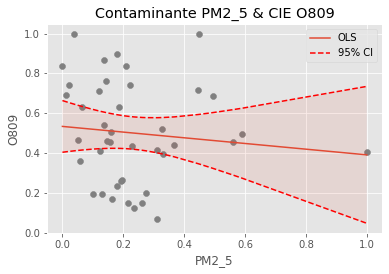

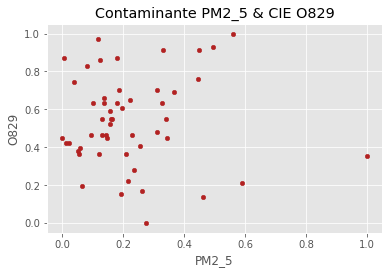

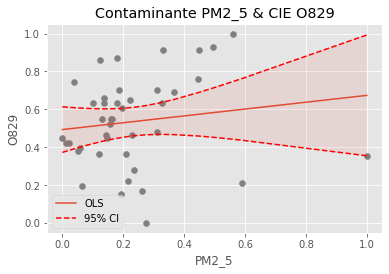

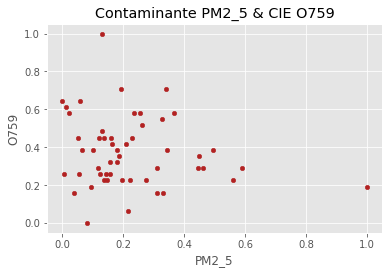

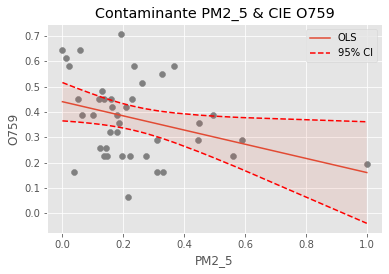

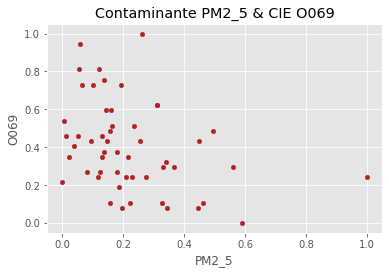

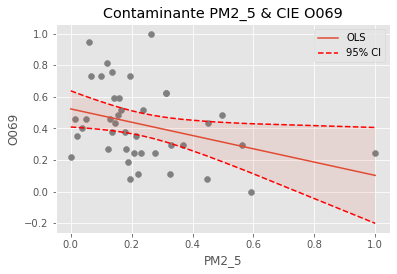

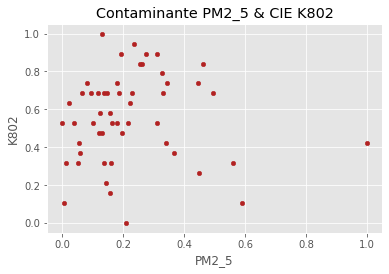

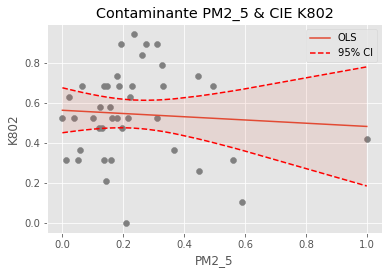

In [28]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import style
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import numpy as np

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
    
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 5

datacorr = []
colors = []
spoke_labels = []

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        
        dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
        for i in range (n):
            dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
        col_names = [contaminante, name]    
        
        # MODELO DE REGRESIÓN LINEAL
        # ==============================================================================
        spoke_labels.append(col_names[1])
        datos = pd.DataFrame(dataframegraficoañocontaminantecie, columns=col_names)
        datos = (datos - datos.min()) / (datos.max() - datos.min())
        # Gráfico
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        datos.plot(
            x    = col_names[0],
            y    = col_names[1],
            c    = 'firebrick',
            kind = "scatter",
            ax   = ax
        )
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        print('\n\n Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        
        # Correlación lineal entre las dos variables
        # ==============================================================================
        corr_test = pearsonr(x = datos[col_names[0]].fillna(0), y =  datos[col_names[1]].fillna(0))
        print("Coeficiente de correlación de Pearson: ", corr_test[0])
        print("P-value: ", corr_test[1])

        datacorr.append(abs(corr_test[0]))
        if(corr_test[0] < 0):
            colors.append('r')
        else: 
            colors.append('b')

        # División de los datos en train y test
        # ==============================================================================
        X = datos[[col_names[0]]].fillna(0)
        y = datos[col_names[1]].fillna(0)

        X_train, X_test, y_train, y_test = train_test_split(
            X.values.reshape(-1,1),
            y.values.reshape(-1,1),
            train_size   = 0.8,
            random_state = 1234,
            shuffle      = True
        )
        
        X_train = sm.add_constant(X_train, prepend=True)
        modelo = sm.OLS(endog=y_train, exog=X_train)
        modelo = modelo.fit()
        print(modelo.summary())
        
        sml = modelo.summary().as_latex()
        namefile = 'modelos_latex/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.tex'
        f = open(namefile, 'w')
        with open(namefile, 'w') as f:
            f.write(sml)

        # Intervalos de confianza para los coeficientes del modelo
        # # ==============================================================================
        modelo.conf_int(alpha=0.05)

        # Predicciones con intervalo de confianza del 95%
        # # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones.head(4)        

        # Predicciones con intervalo de confianza del 95%
        # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones['x'] = X_train[:, 1]
        predicciones['y'] = y_train
        predicciones = predicciones.sort_values('x')

        # Gráfico del modelo
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel(col_names[0])
        ax.set_ylabel(col_names[1])
        ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
        ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
        ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
        ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
        ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
        ax.legend()

        plt.savefig(contaminante + '/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.eps', format='eps')
        plt.savefig(contaminante + '/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')

        # Error de test del modelo 
        # ==============================================================================
        X_test = sm.add_constant(X_test, prepend=True)
        predicciones = modelo.predict(exog = X_test)
        rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
            )
        print("")
        vmin = abs(y_train.min())
        vmax = abs(y_train.max())
        pval = vmin + vmax
        pe = (rmse*100)/pval
        print(f"El error (rmse) de test es: {rmse}")
        print(f"El porcentaje de error de test es: {pe}")


    cont = cont+1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


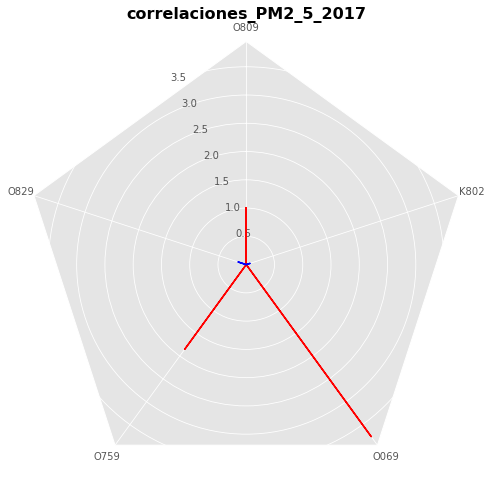

In [29]:
# Se importa el archivo creado
import visualization_spiderwebs

alldata = []
nd = len(datacorr)
for ii in range(nd):
    datatemp = []
    for yy in range(nd):
        if(ii==yy):
            datatemp.append(datacorr[ii])
        else: 
            datatemp.append(0)
    alldata.append(datatemp)
title = 'correlaciones_' + contaminante + '_' + año
visualization_spiderwebs.create_spiderwebs(alldata, 1, title, spoke_labels, colors, 'polygon')

# (Año 2018)

In [30]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2018'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

,timestamp,PM2_5
0,2018-01-01 01,21.00
1,2018-01-01 02,27.00
2,2018-01-01 02,9.00
3,2018-01-01 02,18.00
4,2018-01-01 02,25.00
...,...,...
55746,2018-12-31 23,22.58
55747,2018-12-31 23,199.00
55748,2018-12-31 23,111.00
55749,2018-12-31 23,295.00


In [31]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

,timestamp,PM2_5
0,2018-01-01 01:00:00,21.00
1,2018-01-01 02:00:00,27.00
2,2018-01-01 02:00:00,9.00
3,2018-01-01 02:00:00,18.00
4,2018-01-01 02:00:00,25.00
...,...,...
55746,2018-12-31 23:00:00,22.58
55747,2018-12-31 23:00:00,199.00
55748,2018-12-31 23:00:00,111.00
55749,2018-12-31 23:00:00,295.00


In [32]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

,timestamp,PM2_5,sem
0,2018-01-01 01:00:00,21.00,1
1,2018-01-01 02:00:00,27.00,1
2,2018-01-01 02:00:00,9.00,1
3,2018-01-01 02:00:00,18.00,1
4,2018-01-01 02:00:00,25.00,1
...,...,...,...
55746,2018-12-31 23:00:00,22.58,1
55747,2018-12-31 23:00:00,199.00,1
55748,2018-12-31 23:00:00,111.00,1
55749,2018-12-31 23:00:00,295.00,1


In [33]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI', 'ENTIDAD']
entidad = 19
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño = dataframeegresosaño.loc[dataframeegresosaño['ENTIDAD'] == entidad]
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI
3678,2018-11-15 00:00:00.000,19,N189
3709,2018-08-30 00:00:00.000,19,G562
7046,2018-05-21 00:00:00.000,19,E145
19178,2018-04-26 00:00:00.000,19,P073
100477,2018-08-28 00:00:00.000,19,F191
...,...,...,...
2603999,2018-09-12 00:00:00.000,19,J459
2604006,2018-04-05 00:00:00.000,19,S729
2616019,2018-04-10 00:00:00.000,19,R101
2617800,2018-07-18 00:00:00.000,19,C505


In [34]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S.000'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI,sem
0,2018-11-15,19,N189,46
1,2018-08-30,19,G562,35
2,2018-05-21,19,E145,21
3,2018-04-26,19,P073,17
4,2018-08-28,19,F191,35
...,...,...,...,...
54466,2018-09-12,19,J459,37
54467,2018-04-05,19,S729,14
54468,2018-04-10,19,R101,15
54469,2018-07-18,19,C505,29


In [35]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     1014
2     1037
3     1081
4      984
5     1056
6      994
7     1057
8     1078
9     1039
10    1023
11    1098
12     977
13    1015
14    1024
15    1048
16    1092
17    1049
18     908
19     997
20     980
21    1054
22    1004
23    1087
24    1073
25    1008
26    1082
27    1074
28    1036
29    1056
30    1068
31    1118
32    1108
33    1083
34    1079
35    1136
36    1055
37    1157
38    1163
39    1179
40    1123
41    1192
42    1061
43    1082
44    1002
45    1073
46    1069
47     990
48     994
49     995
50     937
51     973
52     809
Name: sem, dtype: int64

In [36]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

,sem,PM2_5
0,1,27.991437
1,2,26.519313
2,3,25.015692
3,4,26.22114
4,5,23.102564
5,6,32.860858
6,7,29.967695
7,8,26.028986
8,9,27.09833
9,10,23.1529


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



2018


 Contaminante PM2_5 & CIE O809
Coeficiente de correlación de Pearson:  -0.3537007304154925
P-value:  0.010102227576716171
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.360
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.133
Time:                        07:32:43   Log-Likelihood:                 4.1298
No. Observations:                  41   AIC:                            -4.260
Df Residuals:                      39   BIC:                           -0.8325
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.2592336024471015
El porcentaje de error de test es: 27.850096479114278


 Contaminante PM2_5 & CIE O829
Coeficiente de correlación de Pearson:  0.22527688452312147
P-value:  0.10833522177228488
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.890
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.177
Time:                        07:32:43   Log-Likelihood:                -4.2301
No. Observations:                  41   AIC:                             12.46
Df Residuals:                      39   BIC:                             15.89
Df Model:                           1                                         
Covariance Type:            nonrobust                           

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.2564540023113951
El porcentaje de error de test es: 25.645400231139508


 Contaminante PM2_5 & CIE K802
Coeficiente de correlación de Pearson:  0.27286871219463965
P-value:  0.05032762967126014
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     3.827
Date:                Fri, 18 Mar 2022   Prob (F-statistic):             0.0576
Time:                        07:32:43   Log-Likelihood:                 2.7863
No. Observations:                  41   AIC:                            -1.573
Df Residuals:                      39   BIC:                             1.855
Df Model:                           1                                         
Covariance Type:            nonrobust                           

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.1594306829622416
El porcentaje de error de test es: 15.943068296224162


 Contaminante PM2_5 & CIE O342
Coeficiente de correlación de Pearson:  -0.4431063870206061
P-value:  0.0010027929948045805
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     6.828
Date:                Fri, 18 Mar 2022   Prob (F-statistic):             0.0127
Time:                        07:32:44   Log-Likelihood:                -6.5876
No. Observations:                  41   AIC:                             17.18
Df Residuals:                      39   BIC:                             20.60
Df Model:                           1                                         
Covariance Type:            nonrobust                         

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.24525801370912365
El porcentaje de error de test es: 24.525801370912365


 Contaminante PM2_5 & CIE N40X
Coeficiente de correlación de Pearson:  -0.07301311873008018
P-value:  0.6069767659732556
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                   0.03544
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.852
Time:                        07:32:44   Log-Likelihood:               -0.58116
No. Observations:                  41   AIC:                             5.162
Df Residuals:                      39   BIC:                             8.589
Df Model:                           1                                         
Covariance Type:            nonrobust                          

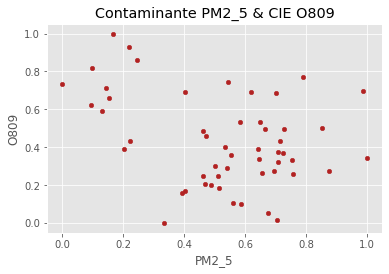

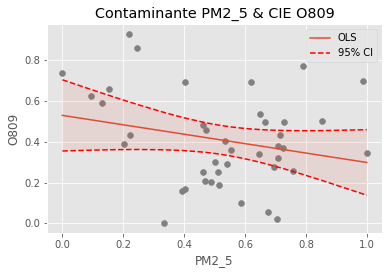

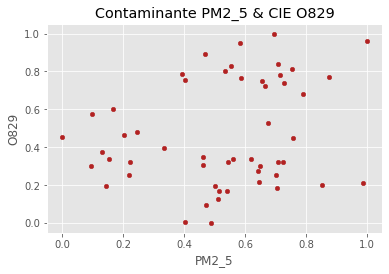

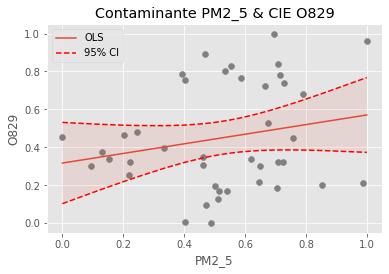

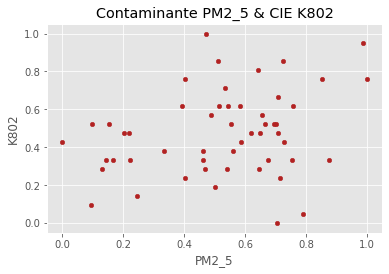

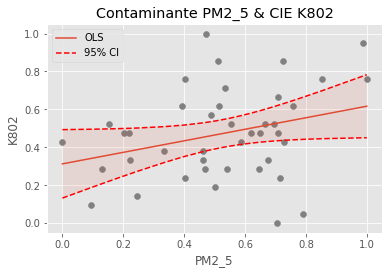

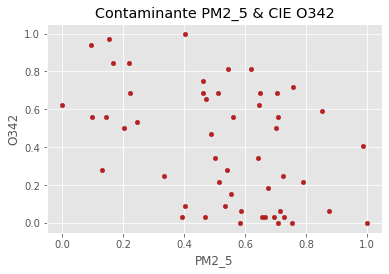

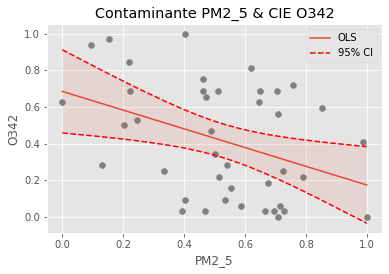

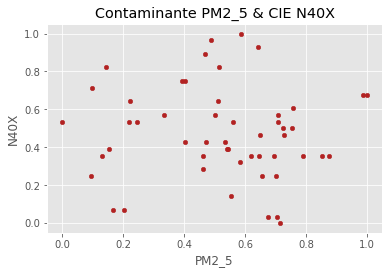

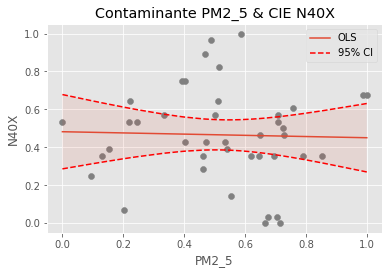

In [37]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import style
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import numpy as np

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
    
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 5

datacorr = []
colors = []
spoke_labels = []

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        
        dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
        for i in range (n):
            dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
        col_names = [contaminante, name]    
        
        # MODELO DE REGRESIÓN LINEAL
        # ==============================================================================
        spoke_labels.append(col_names[1])
        datos = pd.DataFrame(dataframegraficoañocontaminantecie, columns=col_names)
        datos = (datos - datos.min()) / (datos.max() - datos.min())
        # Gráfico
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        datos.plot(
            x    = col_names[0],
            y    = col_names[1],
            c    = 'firebrick',
            kind = "scatter",
            ax   = ax
        )
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        print('\n\n Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        
        # Correlación lineal entre las dos variables
        # ==============================================================================
        corr_test = pearsonr(x = datos[col_names[0]].fillna(0), y =  datos[col_names[1]].fillna(0))
        print("Coeficiente de correlación de Pearson: ", corr_test[0])
        print("P-value: ", corr_test[1])

        datacorr.append(abs(corr_test[0]))
        if(corr_test[0] < 0):
            colors.append('r')
        else: 
            colors.append('b')

        # División de los datos en train y test
        # ==============================================================================
        X = datos[[col_names[0]]].fillna(0)
        y = datos[col_names[1]].fillna(0)

        X_train, X_test, y_train, y_test = train_test_split(
            X.values.reshape(-1,1),
            y.values.reshape(-1,1),
            train_size   = 0.8,
            random_state = 1234,
            shuffle      = True
        )
        
        X_train = sm.add_constant(X_train, prepend=True)
        modelo = sm.OLS(endog=y_train, exog=X_train)
        modelo = modelo.fit()
        print(modelo.summary())
        
        sml = modelo.summary().as_latex()
        namefile = 'modelos_latex/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.tex'
        f = open(namefile, 'w')
        with open(namefile, 'w') as f:
            f.write(sml)

        # Intervalos de confianza para los coeficientes del modelo
        # # ==============================================================================
        modelo.conf_int(alpha=0.05)

        # Predicciones con intervalo de confianza del 95%
        # # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones.head(4)        

        # Predicciones con intervalo de confianza del 95%
        # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones['x'] = X_train[:, 1]
        predicciones['y'] = y_train
        predicciones = predicciones.sort_values('x')

        # Gráfico del modelo
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel(col_names[0])
        ax.set_ylabel(col_names[1])
        ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
        ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
        ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
        ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
        ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
        ax.legend()

        plt.savefig(contaminante + '/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.eps', format='eps')
        plt.savefig(contaminante + '/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')

        # Error de test del modelo 
        # ==============================================================================
        X_test = sm.add_constant(X_test, prepend=True)
        predicciones = modelo.predict(exog = X_test)
        rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
            )
        print("")
        vmin = abs(y_train.min())
        vmax = abs(y_train.max())
        pval = vmin + vmax
        pe = (rmse*100)/pval
        print(f"El error (rmse) de test es: {rmse}")
        print(f"El porcentaje de error de test es: {pe}")


    cont = cont+1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


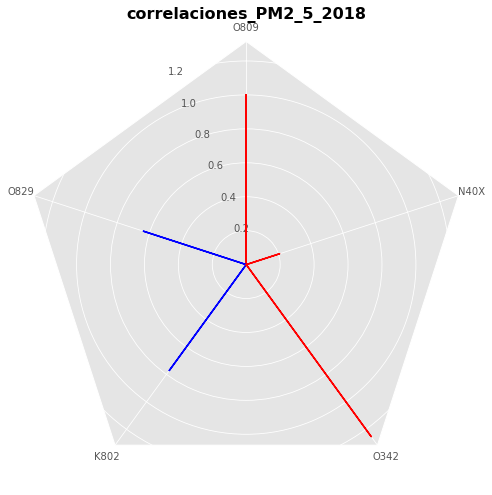

In [38]:
# Se importa el archivo creado
import visualization_spiderwebs

alldata = []
nd = len(datacorr)
for ii in range(nd):
    datatemp = []
    for yy in range(nd):
        if(ii==yy):
            datatemp.append(datacorr[ii])
        else: 
            datatemp.append(0)
    alldata.append(datatemp)
title = 'correlaciones_' + contaminante + '_' + año
visualization_spiderwebs.create_spiderwebs(alldata, 1, title, spoke_labels, colors, 'polygon')